# Analysis of how to delete dotted lines using OpenCV

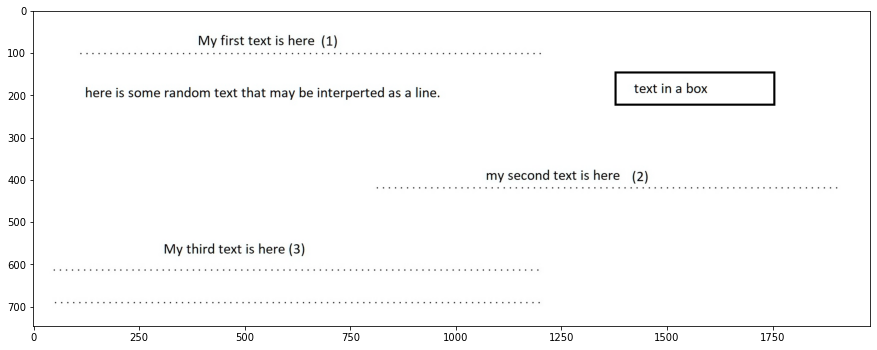

In [1]:
#reference : https://stackoverflow.com/questions/61239652/detect-dotted-broken-lines-only-in-an-image-using-opencv
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('test.jpg')
plt.figure(figsize=(15,15))
plt.imshow(img, cmap='gray')
plt.show()

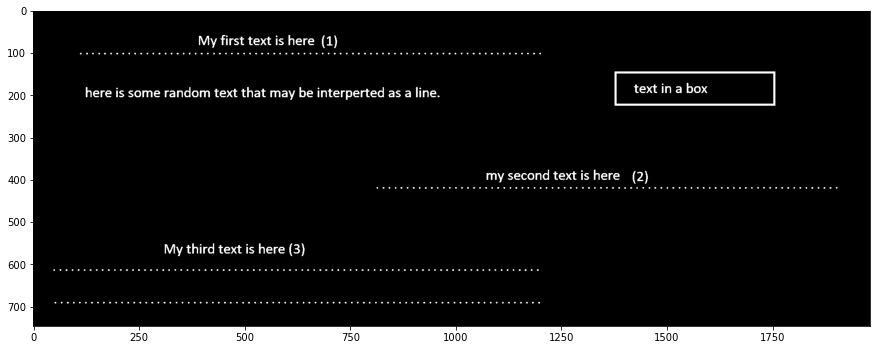

In [2]:
kernel1 = np.ones((3,5),np.uint8)
kernel2 = np.ones((9,9),np.uint8)

imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBW=cv2.threshold(imgGray, 230, 255, cv2.THRESH_BINARY_INV)[1] #Color inversion using Thresh_binary_inv
plt.figure(figsize=(15,15))
plt.imshow(imgBW, cmap='gray')
plt.show()

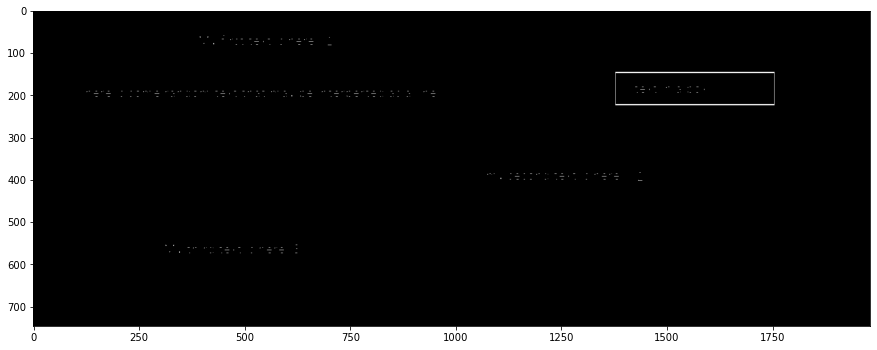

In [3]:
img1=cv2.erode(imgBW, kernel1, iterations=1)
plt.figure(figsize=(15,15)) #delete dotted line using erosion
plt.imshow(img1, cmap='gray')
plt.show()

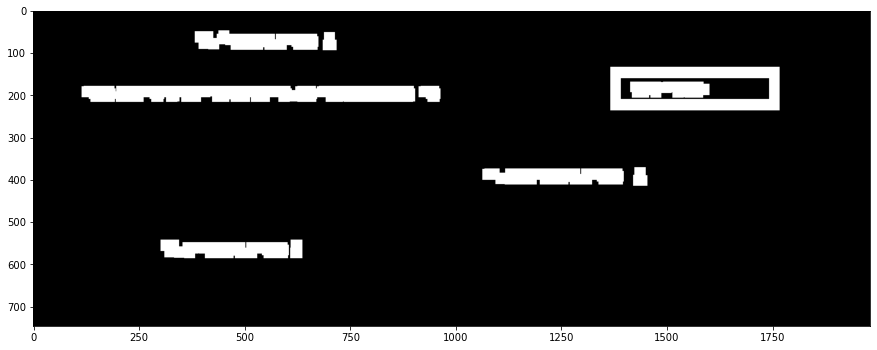

In [4]:
img2=cv2.dilate(img1, kernel2, iterations=3)
plt.figure(figsize=(15,15)) #Conneting dots using dilation
plt.imshow(img2, cmap='gray')
plt.show()

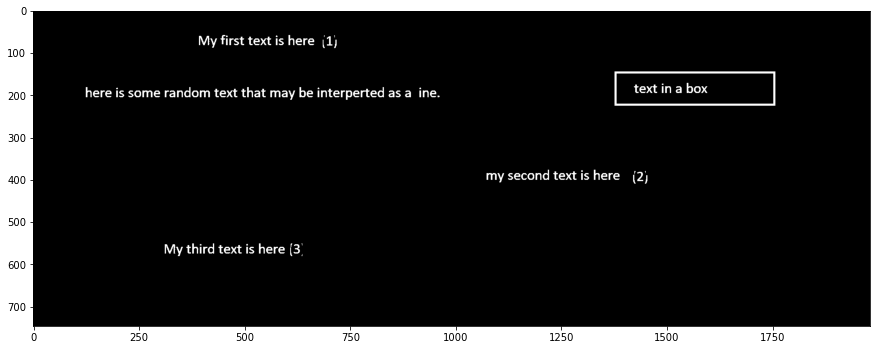

In [5]:
img3 = cv2.bitwise_and(imgBW,img2)
plt.figure(figsize=(15,15)) #only appear letters using bitwise operation between imgBW and img2
plt.imshow(img3, cmap='gray')
plt.show()

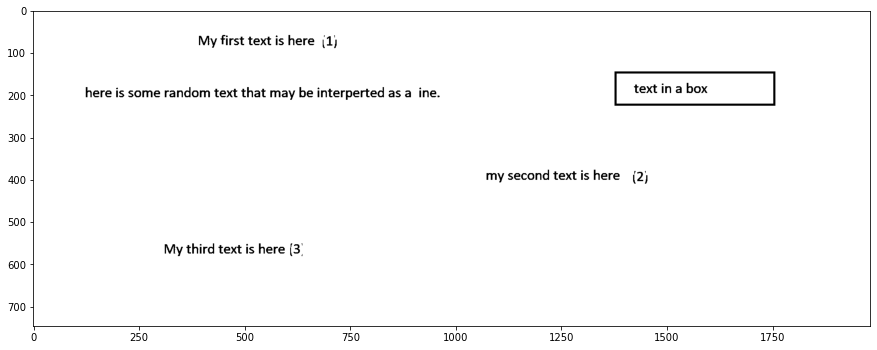

In [6]:
img3 = cv2.bitwise_not(img3)
plt.figure(figsize=(15,15)) #color inversion for bitwise operation
plt.imshow(img3, cmap='gray') 
plt.show()

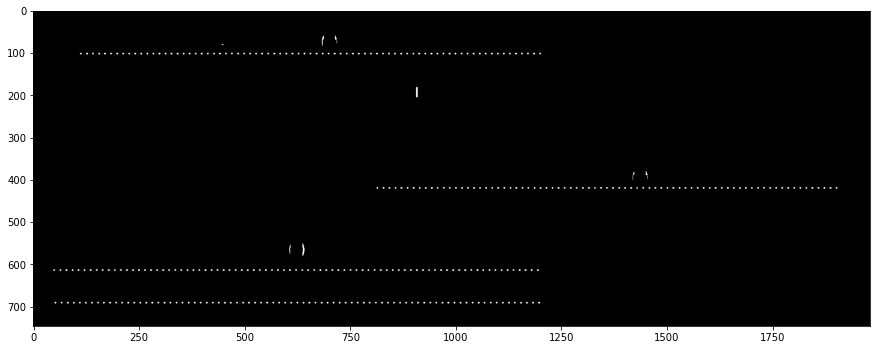

In [7]:
img4 = cv2.bitwise_and(imgBW,imgBW,mask=img3) #bitwise operation between imgBW and masking with img3
plt.figure(figsize=(15,15))
plt.imshow(img4, cmap='gray')
plt.show()

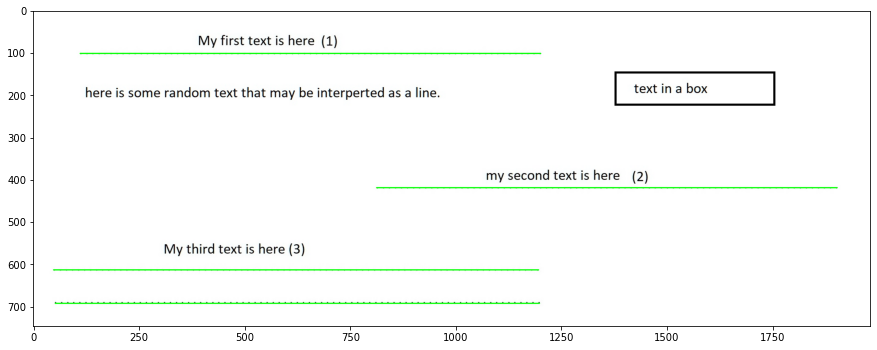

In [8]:
imgLines= cv2.HoughLinesP(img4,15,np.pi/180,10, minLineLength = 440, maxLineGap = 15)

for i in range(len(imgLines)):
    for x1,y1,x2,y2 in imgLines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

# Original Code

In [9]:
import cv2
import numpy as np

img=cv2.imread('test.jpg')

kernel1 = np.ones((3,5),np.uint8)
kernel2 = np.ones((9,9),np.uint8)

imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBW=cv2.threshold(imgGray, 230, 255, cv2.THRESH_BINARY_INV)[1]

img1=cv2.erode(imgBW, kernel1, iterations=1)
img2=cv2.dilate(img1, kernel2, iterations=3)
img3 = cv2.bitwise_and(imgBW,img2)
img3= cv2.bitwise_not(img3)
img4 = cv2.bitwise_and(imgBW,imgBW,mask=img3)
imgLines= cv2.HoughLinesP(img4,15,np.pi/180,10, minLineLength = 440, maxLineGap = 15)

for i in range(len(imgLines)):
    for x1,y1,x2,y2 in imgLines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imshow('Final Image with dotted Lines detected', img)
cv2.waitKey(0)
cv2.destroyAllWindows()